In [17]:
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
from utils.evaluation.jsonEncoder import NpEncoder
def get_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
    return data
SAVE = get_from_json("./Figure/BoxPlots/Result.json")

# Centrality Feature

## ER Model

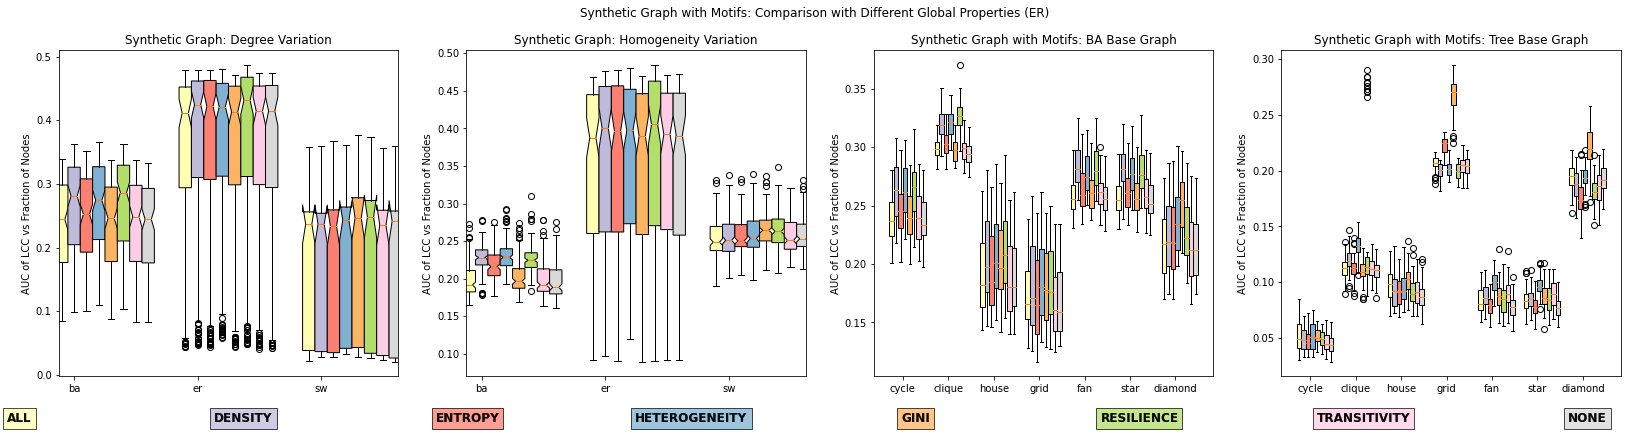

In [19]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['er', 'Density_er', 'Entropy_er', 'Heterogeneity_er','Gini_er','Resilience_er', 'Transitivity_er', 'None_er']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (ER)")
plt.savefig("./Figure/BoxPlots/ER_GlobalFeature.pdf")
plt.show()

## SW Model

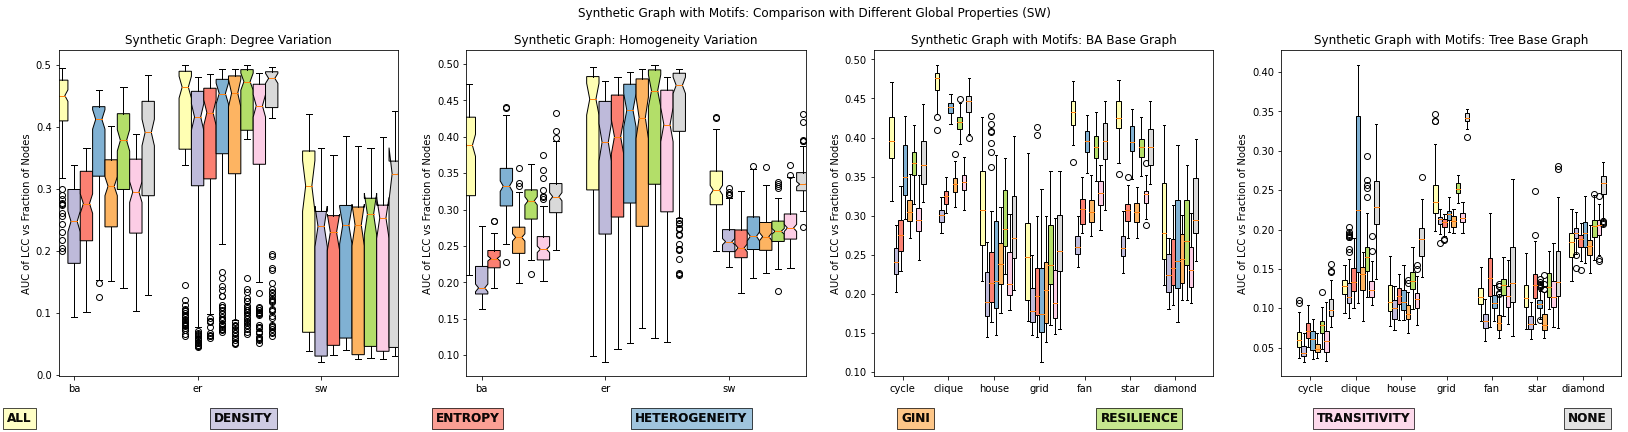

In [20]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['sw', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_ba']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (SW)")
plt.savefig("./Figure/BoxPlots/SW_GlobalFeature.pdf")
plt.show()

## BA Model

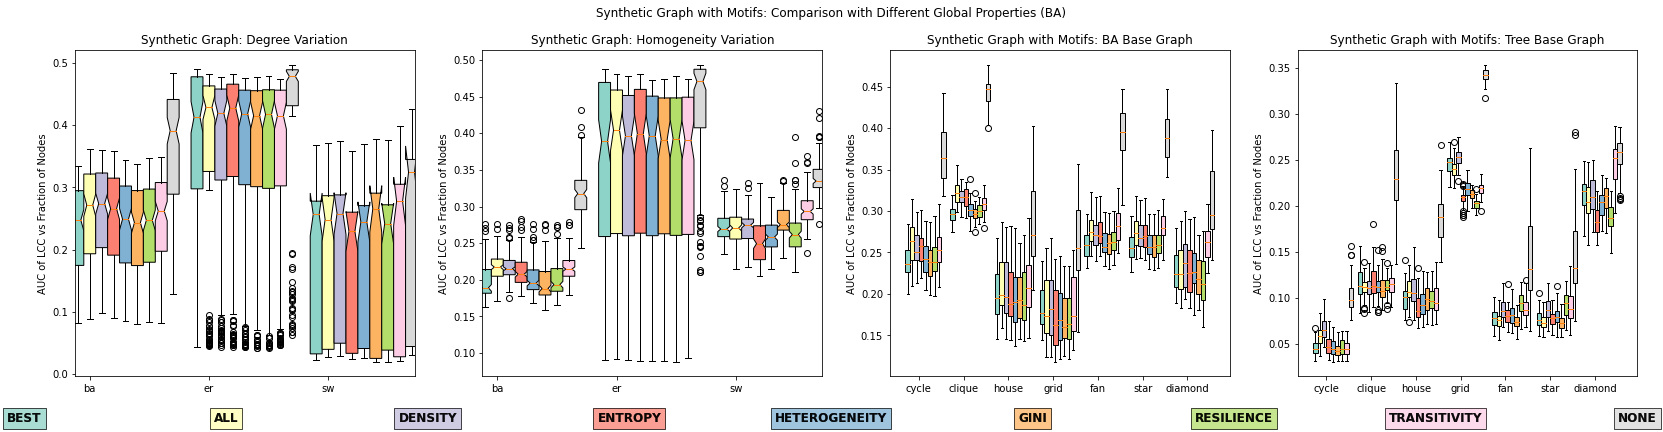

In [14]:
#color = ['pink','red','green','Aquamarine','orange', 'brown', 'blue','yellow']
labeling = ['Best','All', 'Density', 'Entropy', 'Heterogeneity', 'Gini','Resilience', 'Transitivity', 'None']
color = ['#8dd3c7', '#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9']
model_name = ['ba','All_ba', 'Density_ba', 'Entropy_ba', 'Heterogeneity_ba','Gini_ba','Resilience_ba', 'Transitivity_ba', 'None_ba']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (BA)")
plt.savefig("./Figure/BoxPlots/BA_GlobalFeature.pdf")
plt.show()

## Mix Model

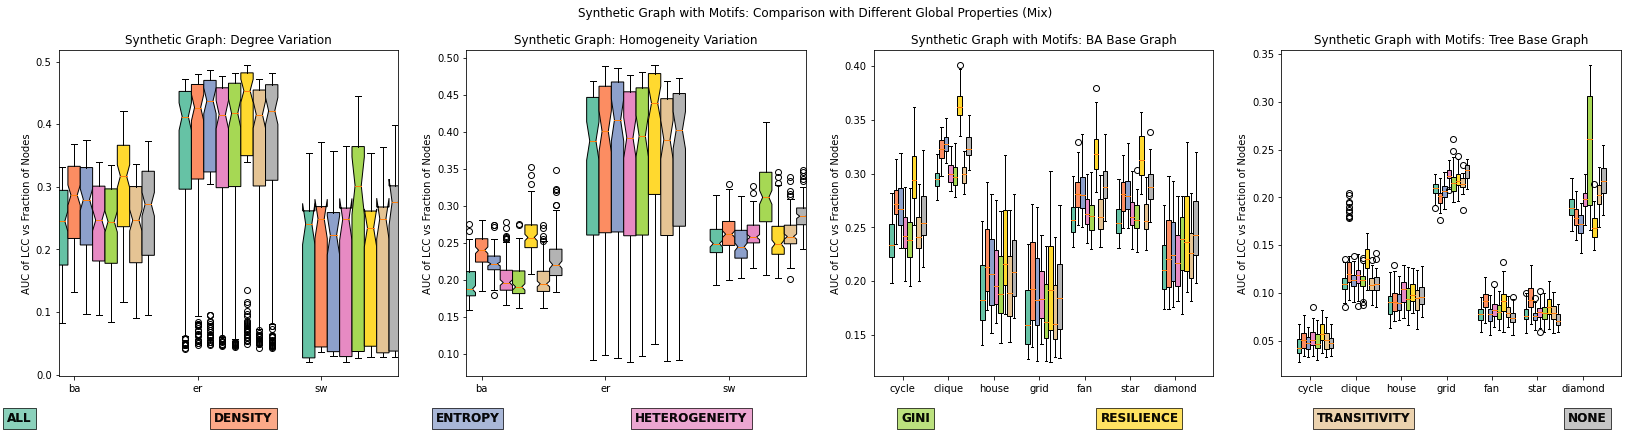

In [3]:
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini' ,'Resilience','Transitivity', 'None']
model_name = ['mix', 'Density_mix', 'Entropy_mix', 'Heterogeneity_mix','Gini_mix','Resilience_mix', 'Transitivity_mix', 'None_mix']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (Mix)")
plt.savefig("./Figure/BoxPlots/Mix_GlobalFeature.pdf")
plt.show()

## Small World Model

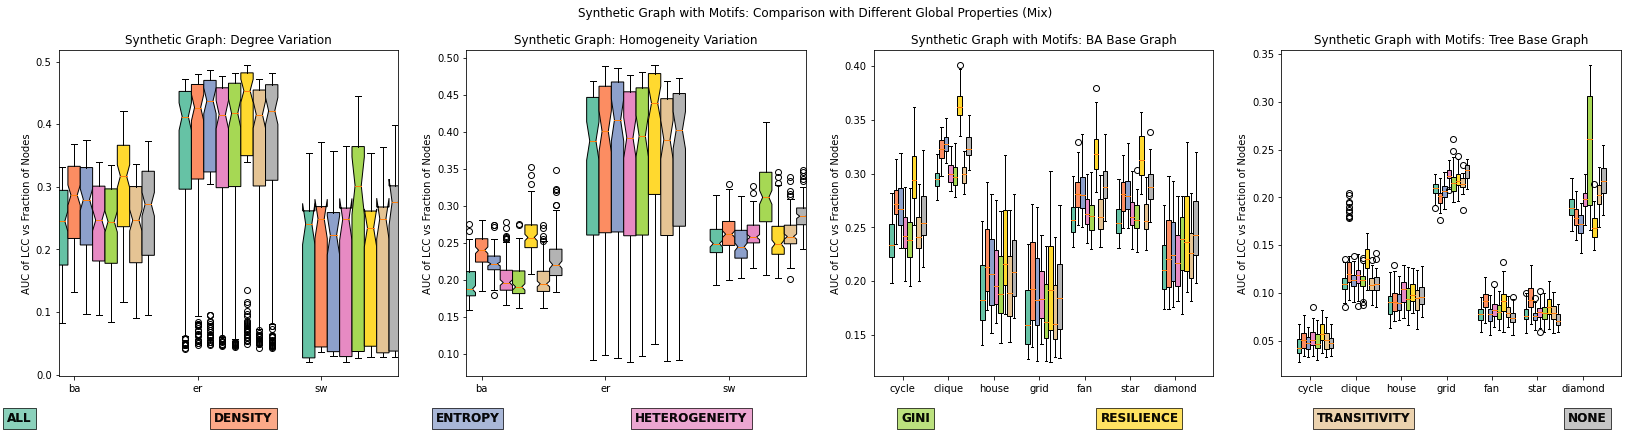

In [3]:
color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f','#e5c494','#b3b3b3']
labeling = ['All', 'Density', 'Entropy', 'Heterogeneity', 'Gini' ,'Resilience','Transitivity', 'None']
model_name = ['sw', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_sw']
measure = 'auc'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.05, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Synthetic Graph with Motifs: Comparison with Different Global Properties (Mix)")
plt.savefig("./Figure/BoxPlots/Mix_GlobalFeature.pdf")
plt.show()

# Largest Connected Components

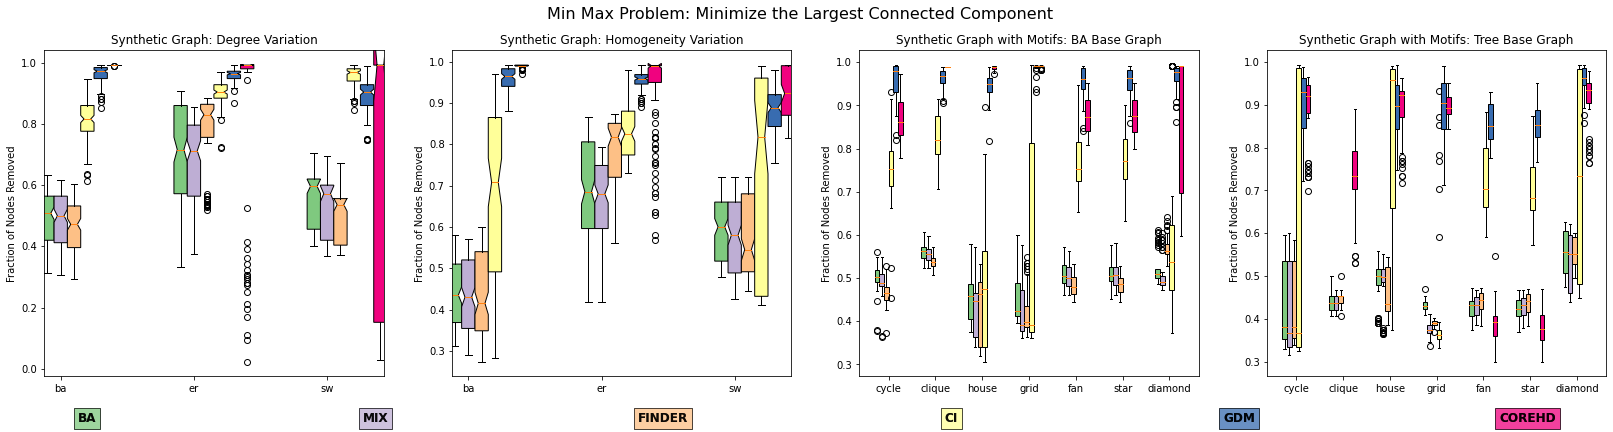

In [4]:
#obj = [ba, mix, finder, ci,gdm, core]
color = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
labeling = ['ba', 'mix', 'finder', 'ci','gdm','corehd']
model_name = ['ba', 'mix', 'finder', 'ci','gdm','corehd']
measure = 'auc'
measure = 'fraction'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    if measure == 'auc':
                        ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        if measure == 'auc':
                            ax[pos].set_ylabel('AUC of LCC vs Fraction of Nodes')
                        else:
                            ax[pos].set_ylabel('Fraction of Nodes Removed')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.075, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Min Max Problem: Minimize the Largest Connected Component", fontsize=16)
if measure == 'auc':
    plt.savefig("./Figure/BoxPlots/MinMax_AUC.pdf")
else:
    plt.savefig("./Figure/BoxPlots/MinMax_Fraction.pdf")
plt.show()

# Pairwise Connectivity

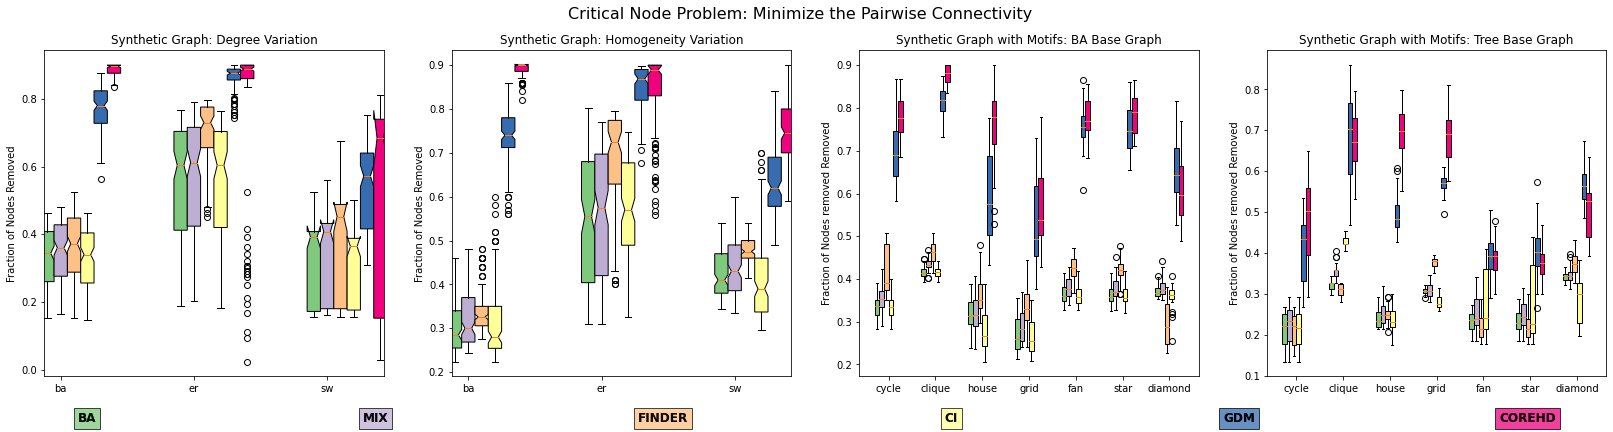

In [9]:
#obj = [ba_CN, mix_CN, finder_CN, ci_CN,gdm_CN,core_CN]
color = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
color = ['#7fc97f','#beaed4','#fdc086','#ffff99','#f0027f']
labeling = ['ba', 'mix', 'finder', 'ci','corehd']
model_name = ['ba_CN', 'mix_CN', 'finder_CN', 'ci_CN','gdm_CN','corehd_CN']
model_name = ['ba_CN', 'mix_CN', 'finder_CN', 'ci_CN','corehd_CN']
measure = 'auc'
measure = 'fraction'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    if measure == 'auc':
                        ax[pos].set_ylabel('Mean AUC of Pairwise Connectivity vs Fraction of Nodes')
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        if measure == 'auc':
                            ax[pos].set_ylabel('AUC of Pairwise Connectivity vs Fraction of Nodes')
                        else:
                            ax[pos].set_ylabel('Fraction of Nodes removed Removed')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.075, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("Critical Node Problem: Minimize the Pairwise Connectivity", fontsize=16)
if measure == 'auc':
    plt.savefig("./Figure/BoxPlots/CNP_AUC.pdf")
else:
    plt.savefig("./Figure/BoxPlots/CNP_Fraction.pdf")
plt.show()

# Maximum Number of Connected Components 

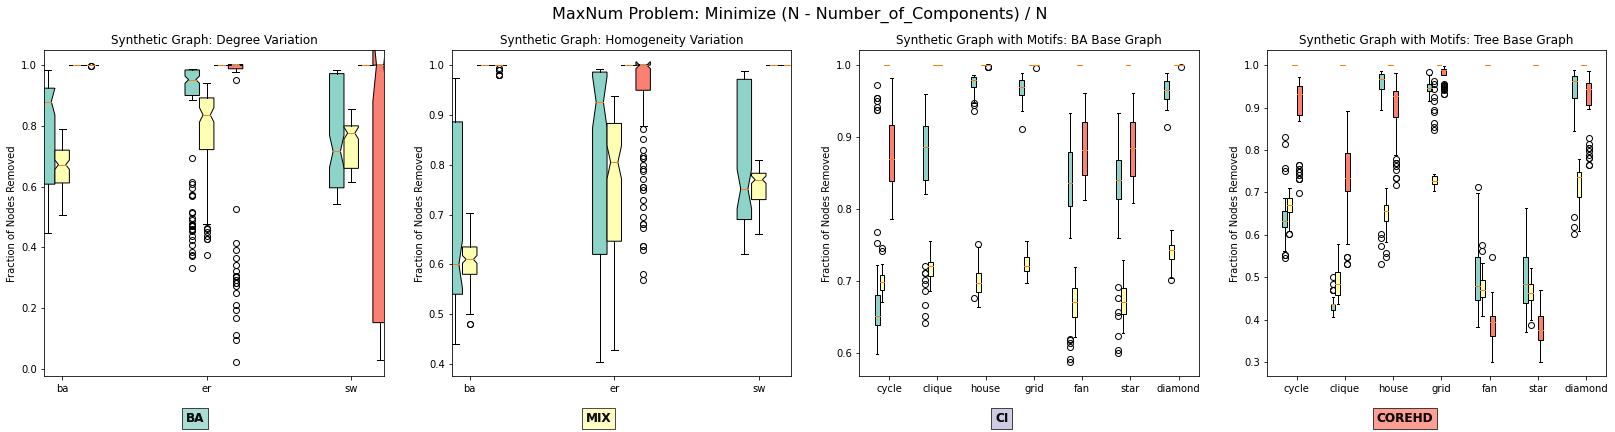

In [6]:
#obj = [ba_MaxNum, mix_MaxNum, ci_MaxNum,core_MaxNum]
color = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
labeling = ['ba', 'mix', 'ci','corehd']
model_name = ['ba_MaxNum', 'mix_MaxNum',  'ci_MaxNum','corehd_MaxNum']
measure = 'auc'
measure = 'fraction'
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(28, 6))
n_models = len(labeling)
shift = 1 / (n_models + 1)
for method in ["result_Syn","result_SynMotif"]:
        for color_code, model in enumerate(model_name):
            if method == "result_Syn":
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    if measure == 'auc':
                        ax[pos].set_ylabel('Mean AUC of (N - Max Num/N) vs Fraction of Nodes')
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                    ax[pos].title.set_text("Synthetic Graph: " +evalType + " Variation")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
            else:
                for pos,evalType in enumerate(['BA','Tree']):
                    pos +=2
                    result = SAVE[model][method]
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                        if measure == 'auc':
                            ax[pos].set_ylabel('AUC of (N - Max Num/N) vs Fraction of Nodes')
                        else:
                            ax[pos].set_ylabel('Fraction of Nodes Removed')
                        ax[pos].title.set_text("Synthetic Graph with Motifs: " +evalType + " Base Graph")
                        ax[pos].set_xticks(np.arange(0, len(data))*20)
                        ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.1, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
fig.suptitle("MaxNum Problem: Minimize (N - Number_of_Components) / N", fontsize=16)
if measure == 'auc':
    plt.savefig("./Figure/BoxPlots/MaxNum_AUC.pdf")
else:
    plt.savefig("./Figure/BoxPlots/MaxNum_Fraction.pdf")
plt.show()

# For only AUC

In [7]:
'''#obj = [ba_MaxNum, mix_MaxNum, ci_MaxNum,core_MaxNum]
color = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
labeling = ['ba', 'mix', 'ci','corehd']
model_name = ['ba_MaxNum', 'mix_MaxNum',  'ci_MaxNum','corehd_MaxNum']
measure = 'auc'
for method in ["result_Syn"]:
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
        n_models = len(labeling)
        shift = 1 / (n_models + 1)
        for color_code, model in enumerate(model_name):
                for pos,evalType in enumerate(['Degree','Homogeneity']):
                    result = SAVE[model][method]
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    ax[pos].set_ylabel('AUC of (N - MaxNum/N) vs Fraction of Nodes')
                    ax[pos].title.set_text(evalType + " Variation Evaluation Dataset")
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
                x = (color_code + 1) * shift - shift / 2
                fig.text(x+0.1, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
        fig.suptitle("MaxNum Problem: Synthetic Graph")
        #plt.savefig("./Figure/BoxPlots/MaxNum_"+evalType+".pdf")
        plt.show()
measure = 'auc'
for method in ["result_SynMotif"]:
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
    n_models = len(labeling)
    shift = 1 / (n_models + 1)
    for color_code, model in enumerate(model_name):
            for pos,evalType in enumerate(['BA','Tree']):
                result = SAVE[model][method]
                data = {"cycle":result[evalType]["cycle"][measure], 
                            "clique":result[evalType]["clique"][measure],
                            "house":result[evalType]["house"][measure], 
                            "grid":result[evalType]["grid"][measure],
                            "fan":result[evalType]["fan"][measure],
                            "star":result[evalType]["star"][measure],
                            "diamond":result[evalType]["diamond"][measure]
                           }
                for position,key in enumerate(data):
                    ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                ax[pos].set_ylabel('AUC of (N - Max Num/N) vs Fraction of Nodes')
                ax[pos].title.set_text(evalType + " Base Graph")
                ax[pos].set_xticks(np.arange(0, len(data))*20)
                ax[pos].set_xticklabels(data.keys())
            x = (color_code + 1) * shift - shift / 2
            fig.text(x+0.1, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
    fig.suptitle("MaxNum: Synthetic Graph with Motifs")
    #plt.savefig("./Figure/BoxPlots/MaxNum_"+evalType+".pdf")
    plt.show()'''

'#obj = [ba_MaxNum, mix_MaxNum, ci_MaxNum,core_MaxNum]\ncolor = [\'#8dd3c7\',\'#ffffb3\',\'#bebada\',\'#fb8072\']\nlabeling = [\'ba\', \'mix\', \'ci\',\'corehd\']\nmodel_name = [\'ba_MaxNum\', \'mix_MaxNum\',  \'ci_MaxNum\',\'corehd_MaxNum\']\nmeasure = \'auc\'\nfor method in ["result_Syn"]:\n        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))\n        n_models = len(labeling)\n        shift = 1 / (n_models + 1)\n        for color_code, model in enumerate(model_name):\n                for pos,evalType in enumerate([\'Degree\',\'Homogeneity\']):\n                    result = SAVE[model][method]\n                    data = {"ba":result[evalType]["barabasi"][measure], \n                    "er":result[evalType]["erdos"][measure], \n                    "sw":result[evalType]["small-world"][measure]}\n                    for position,key in enumerate(data):\n                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, b

# For each Single

In [8]:
'''#obj = [ba_CN, mix_CN, finder_CN, ci_CN,gdm_CN,core_CN]
color = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
labeling = ['ba', 'mix', 'finder', 'ci','gdm','corehd']
model_name = ['ba_CN', 'mix_CN', 'finder_CN', 'ci_CN','gdm_CN','corehd_CN']
for method in ["result_Syn"]:
    for evalType in ['Degree','Homogeneity']:
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
        n_models = len(labeling)
        shift = 1 / (n_models + 1)
        for color_code, model in enumerate(model_name):
                #result = getattr(model, method) 
                result = SAVE[model][method]
                for pos,measure in enumerate(["auc","fraction"]):
                    shift = 0.1
                    data = {"ba":result[evalType]["barabasi"][measure], 
                    "er":result[evalType]["erdos"][measure], 
                    "sw":result[evalType]["small-world"][measure]}
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-2+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]), notch = True)
                    if measure == "auc":
                        ax[pos].set_ylabel('AUC of Pairwise Connectivity vs Fraction of Nodes')
                        ax[pos].title.set_text('Area Under the Curve')
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                        ax[pos].title.set_text('Fraction of Nodes Removed')
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
                x = (color_code + 1) * shift - shift / 2
                fig.text(x, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
        fig.suptitle("Critical Node Problem: Synthetic Graph for "+evalType+" variation")
        plt.savefig("./Figure/BoxPlots/CNP_"+evalType+".pdf")
        plt.show()

for method in ["result_SynMotif"]:
    for evalType in ['BA','Tree']:
        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
        n_models = len(labeling)
        shift = 1 / (n_models + 1)
        for color_code, model in enumerate(model_name):
                #result = getattr(model, method) 
                result = SAVE[model][method]
                for pos,measure in enumerate(["auc","fraction"]):
                    shift = 0.1
                    data = {"cycle":result[evalType]["cycle"][measure], 
                                "clique":result[evalType]["clique"][measure],
                                "house":result[evalType]["house"][measure], 
                                "grid":result[evalType]["grid"][measure],
                                "fan":result[evalType]["fan"][measure],
                                "star":result[evalType]["star"][measure],
                                "diamond":result[evalType]["diamond"][measure]
                               }
                    for position,key in enumerate(data):
                        ax[pos].boxplot(data[key],  positions=[-5+position*20+color_code*2], widths=2,patch_artist=True, boxprops=dict(facecolor=color[color_code]))
                    if measure == "auc":
                        ax[pos].set_ylabel('AUC of Pairwise Connectivity vs Fraction of Nodes')
                        ax[pos].title.set_text('Area Under the Curve')
                    else:
                        ax[pos].set_ylabel('Fraction of Nodes Removed')
                        ax[pos].title.set_text('Fraction of Nodes Removed')
                    ax[pos].set_xticks(np.arange(0, len(data))*20)
                    ax[pos].set_xticklabels(data.keys())
                x = (color_code + 1) * shift - shift / 2
                fig.text(x, 0.02,labeling[color_code].upper(),alpha = 0.9, color='black', bbox=dict(facecolor=color[color_code], alpha=0.5), weight='bold', size='large',horizontalalignment='center')
        fig.suptitle("Critical Node Problem: Synthetic Graph with Motifs for "+evalType+" base graph")
        plt.savefig("./Figure/BoxPlots/CNP_"+evalType+".pdf")
        plt.show()'''

'#obj = [ba_CN, mix_CN, finder_CN, ci_CN,gdm_CN,core_CN]\ncolor = [\'#7fc97f\',\'#beaed4\',\'#fdc086\',\'#ffff99\',\'#386cb0\',\'#f0027f\']\nlabeling = [\'ba\', \'mix\', \'finder\', \'ci\',\'gdm\',\'corehd\']\nmodel_name = [\'ba_CN\', \'mix_CN\', \'finder_CN\', \'ci_CN\',\'gdm_CN\',\'corehd_CN\']\nfor method in ["result_Syn"]:\n    for evalType in [\'Degree\',\'Homogeneity\']:\n        fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))\n        n_models = len(labeling)\n        shift = 1 / (n_models + 1)\n        for color_code, model in enumerate(model_name):\n                #result = getattr(model, method) \n                result = SAVE[model][method]\n                for pos,measure in enumerate(["auc","fraction"]):\n                    shift = 0.1\n                    data = {"ba":result[evalType]["barabasi"][measure], \n                    "er":result[evalType]["erdos"][measure], \n                    "sw":result[evalType]["small-world"][measure]}\n                    for 